In [47]:
import sys
import os
sys.path.append("""/home/jonfrey/ASL/src""")
os.chdir("/home/jonfrey/ASL")

import torch
import numpy as np
from PIL import Image
import imageio
import pickle
from visu import Visualizer
from PIL import ImageDraw, ImageFont
from torchvision import transforms as tf

from sklearn.metrics import confusion_matrix
from pseudo_label import getPathsSegmentation, readSegmentation

visu = Visualizer(os.getenv('HOME')+'/tmp', logger=None, epoch=0, store=False, num_classes=41)


In [25]:
def paths_acc_conf(paths, plot=True):
    agg = None
    for j,p in enumerate( paths ):
        pred, target, valid = readSegmentation(p)
    #     r= visu.plot_segmentation(seg= pred+1,jupyter=True)
    #     r= visu.plot_segmentation(seg= target+1 ,jupyter=True)
        conf = confusion_matrix(target.flatten(), pred.flatten(), labels=np.arange(40))
        if agg is None:
            agg = conf
        else:
            agg += conf
        if j % 50 == 0:
            print(f"{j}/{len(paths_dl)}")
    if plot:
        r= visu.plot_nyu_confusion_matrix(agg ,jupyter=True)

    sel = np.eye( agg.shape[0] )
    acc = agg[sel==1].sum() / agg.sum()
    

    return acc, agg

0/352
50/352
100/352
150/352
200/352
250/352
300/352
350/352


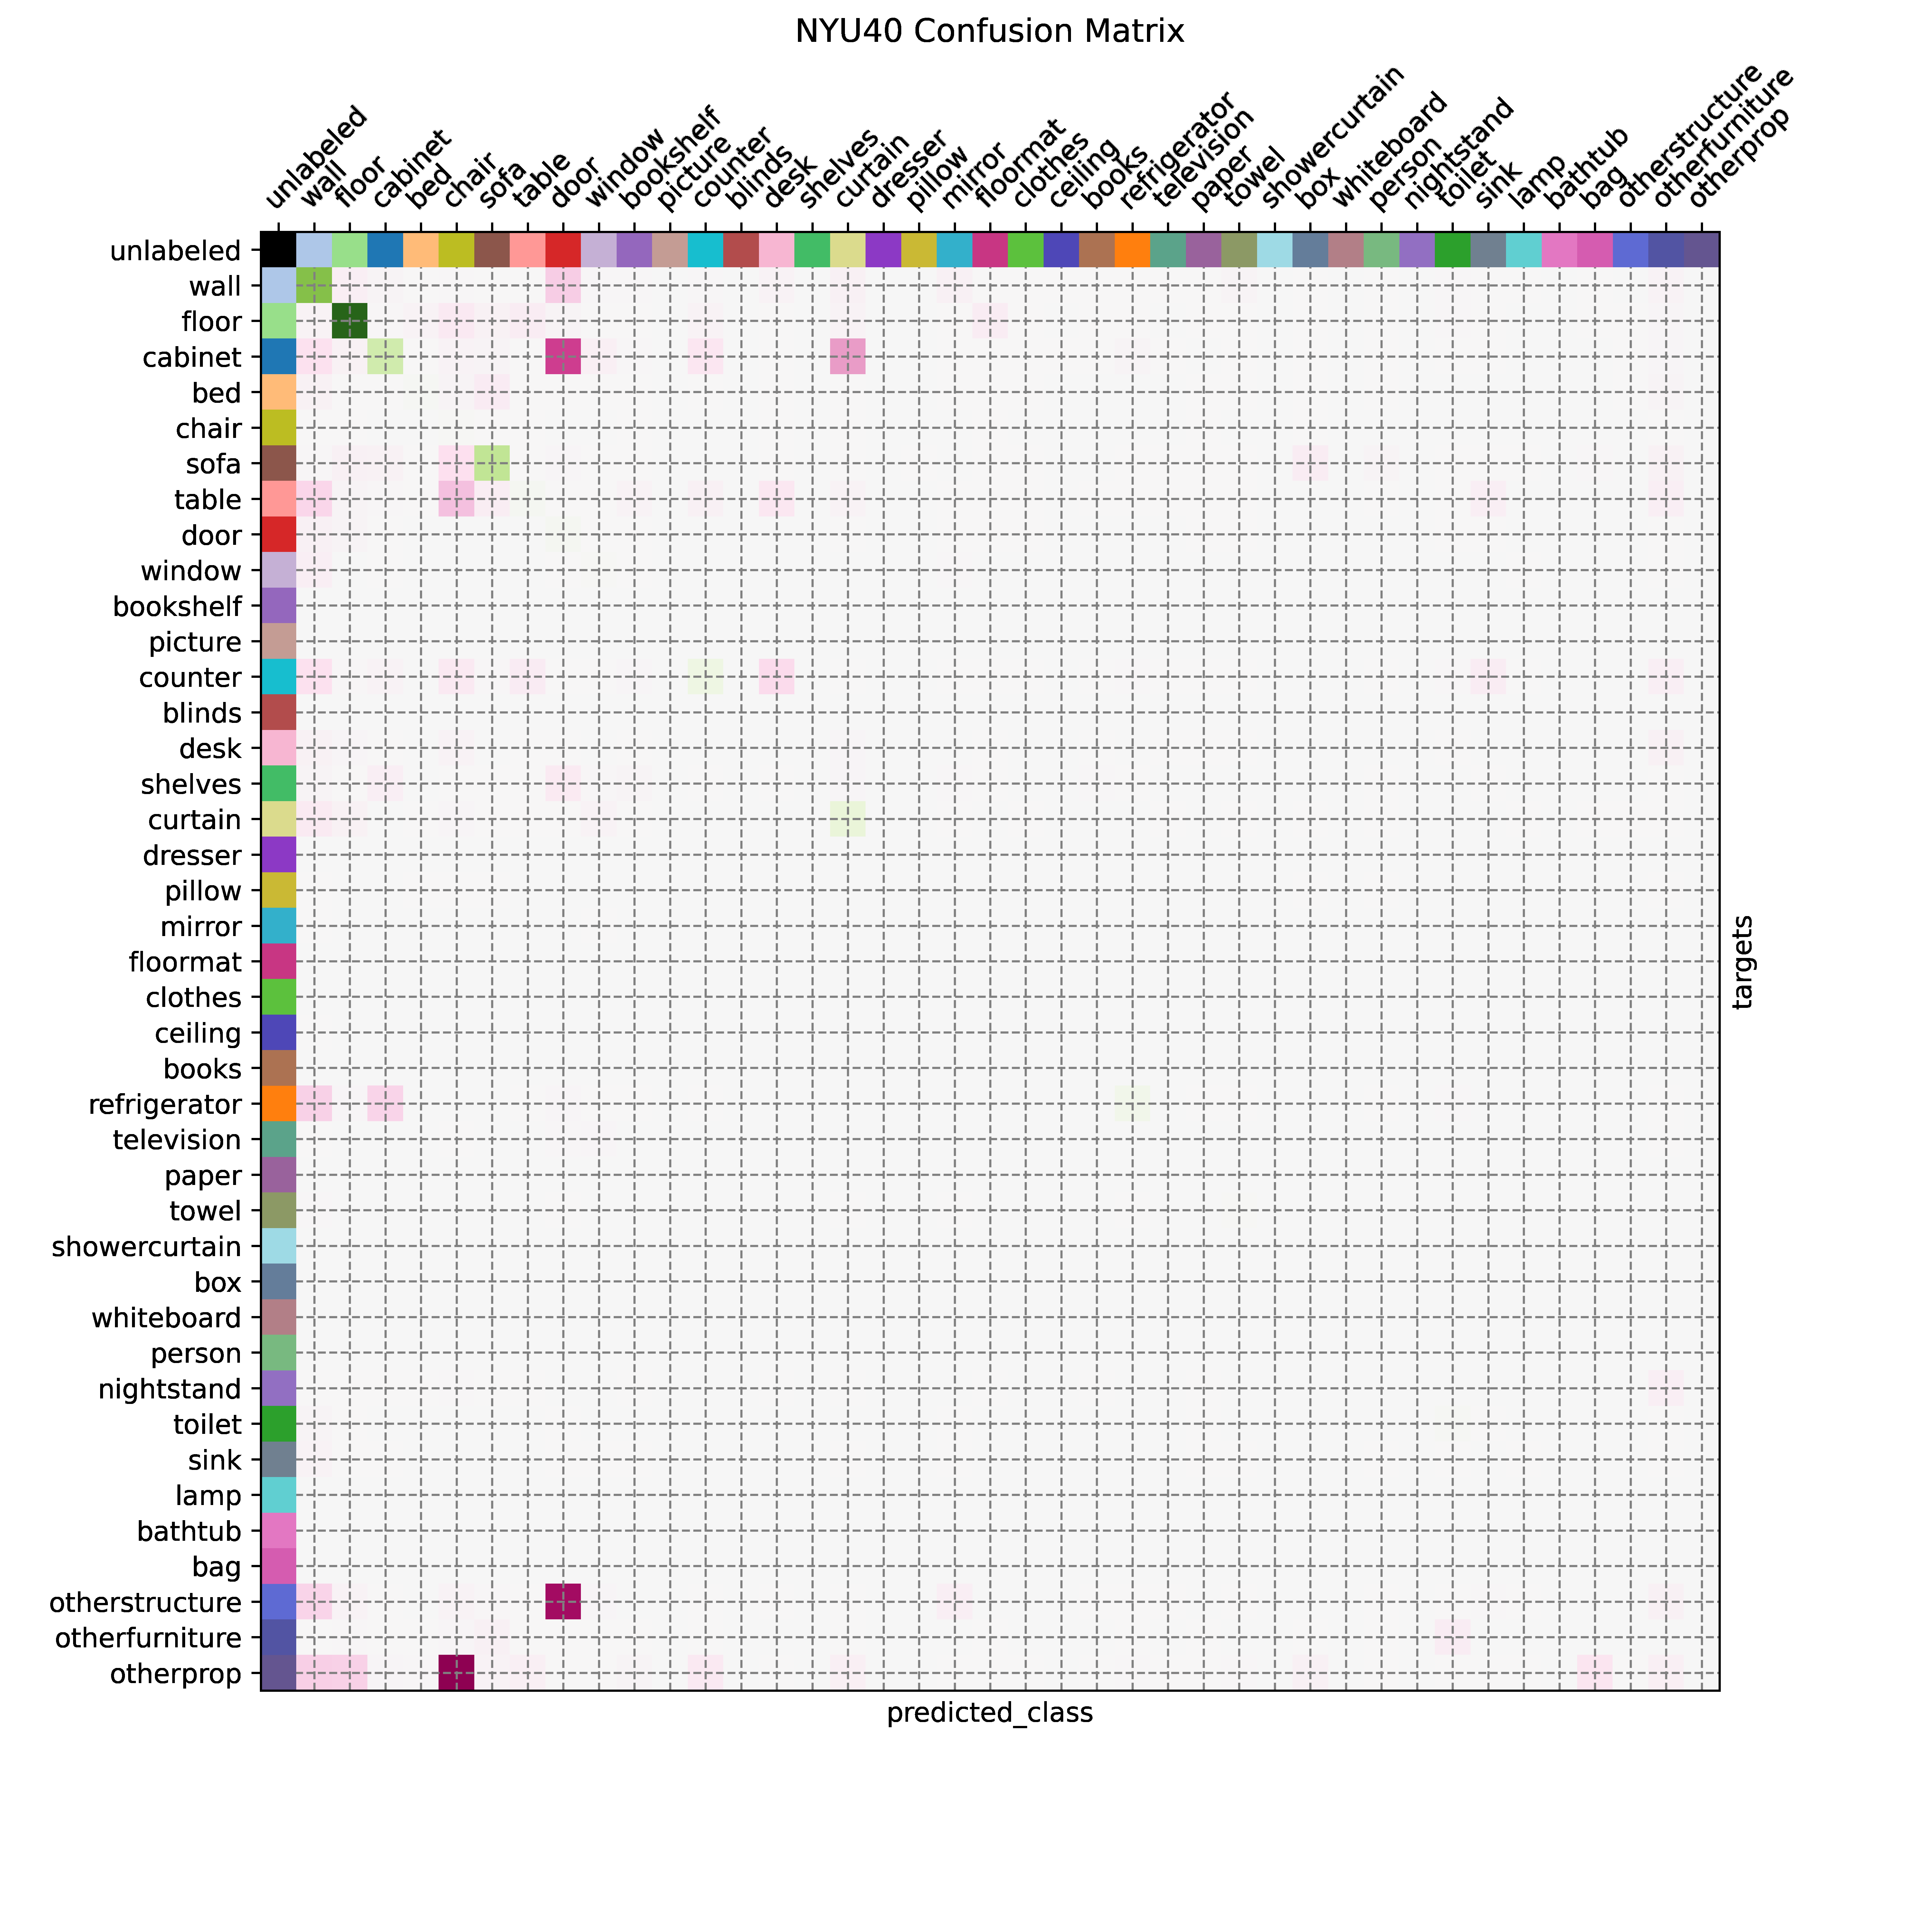

0/352
50/352
100/352
150/352
200/352
250/352
300/352
350/352


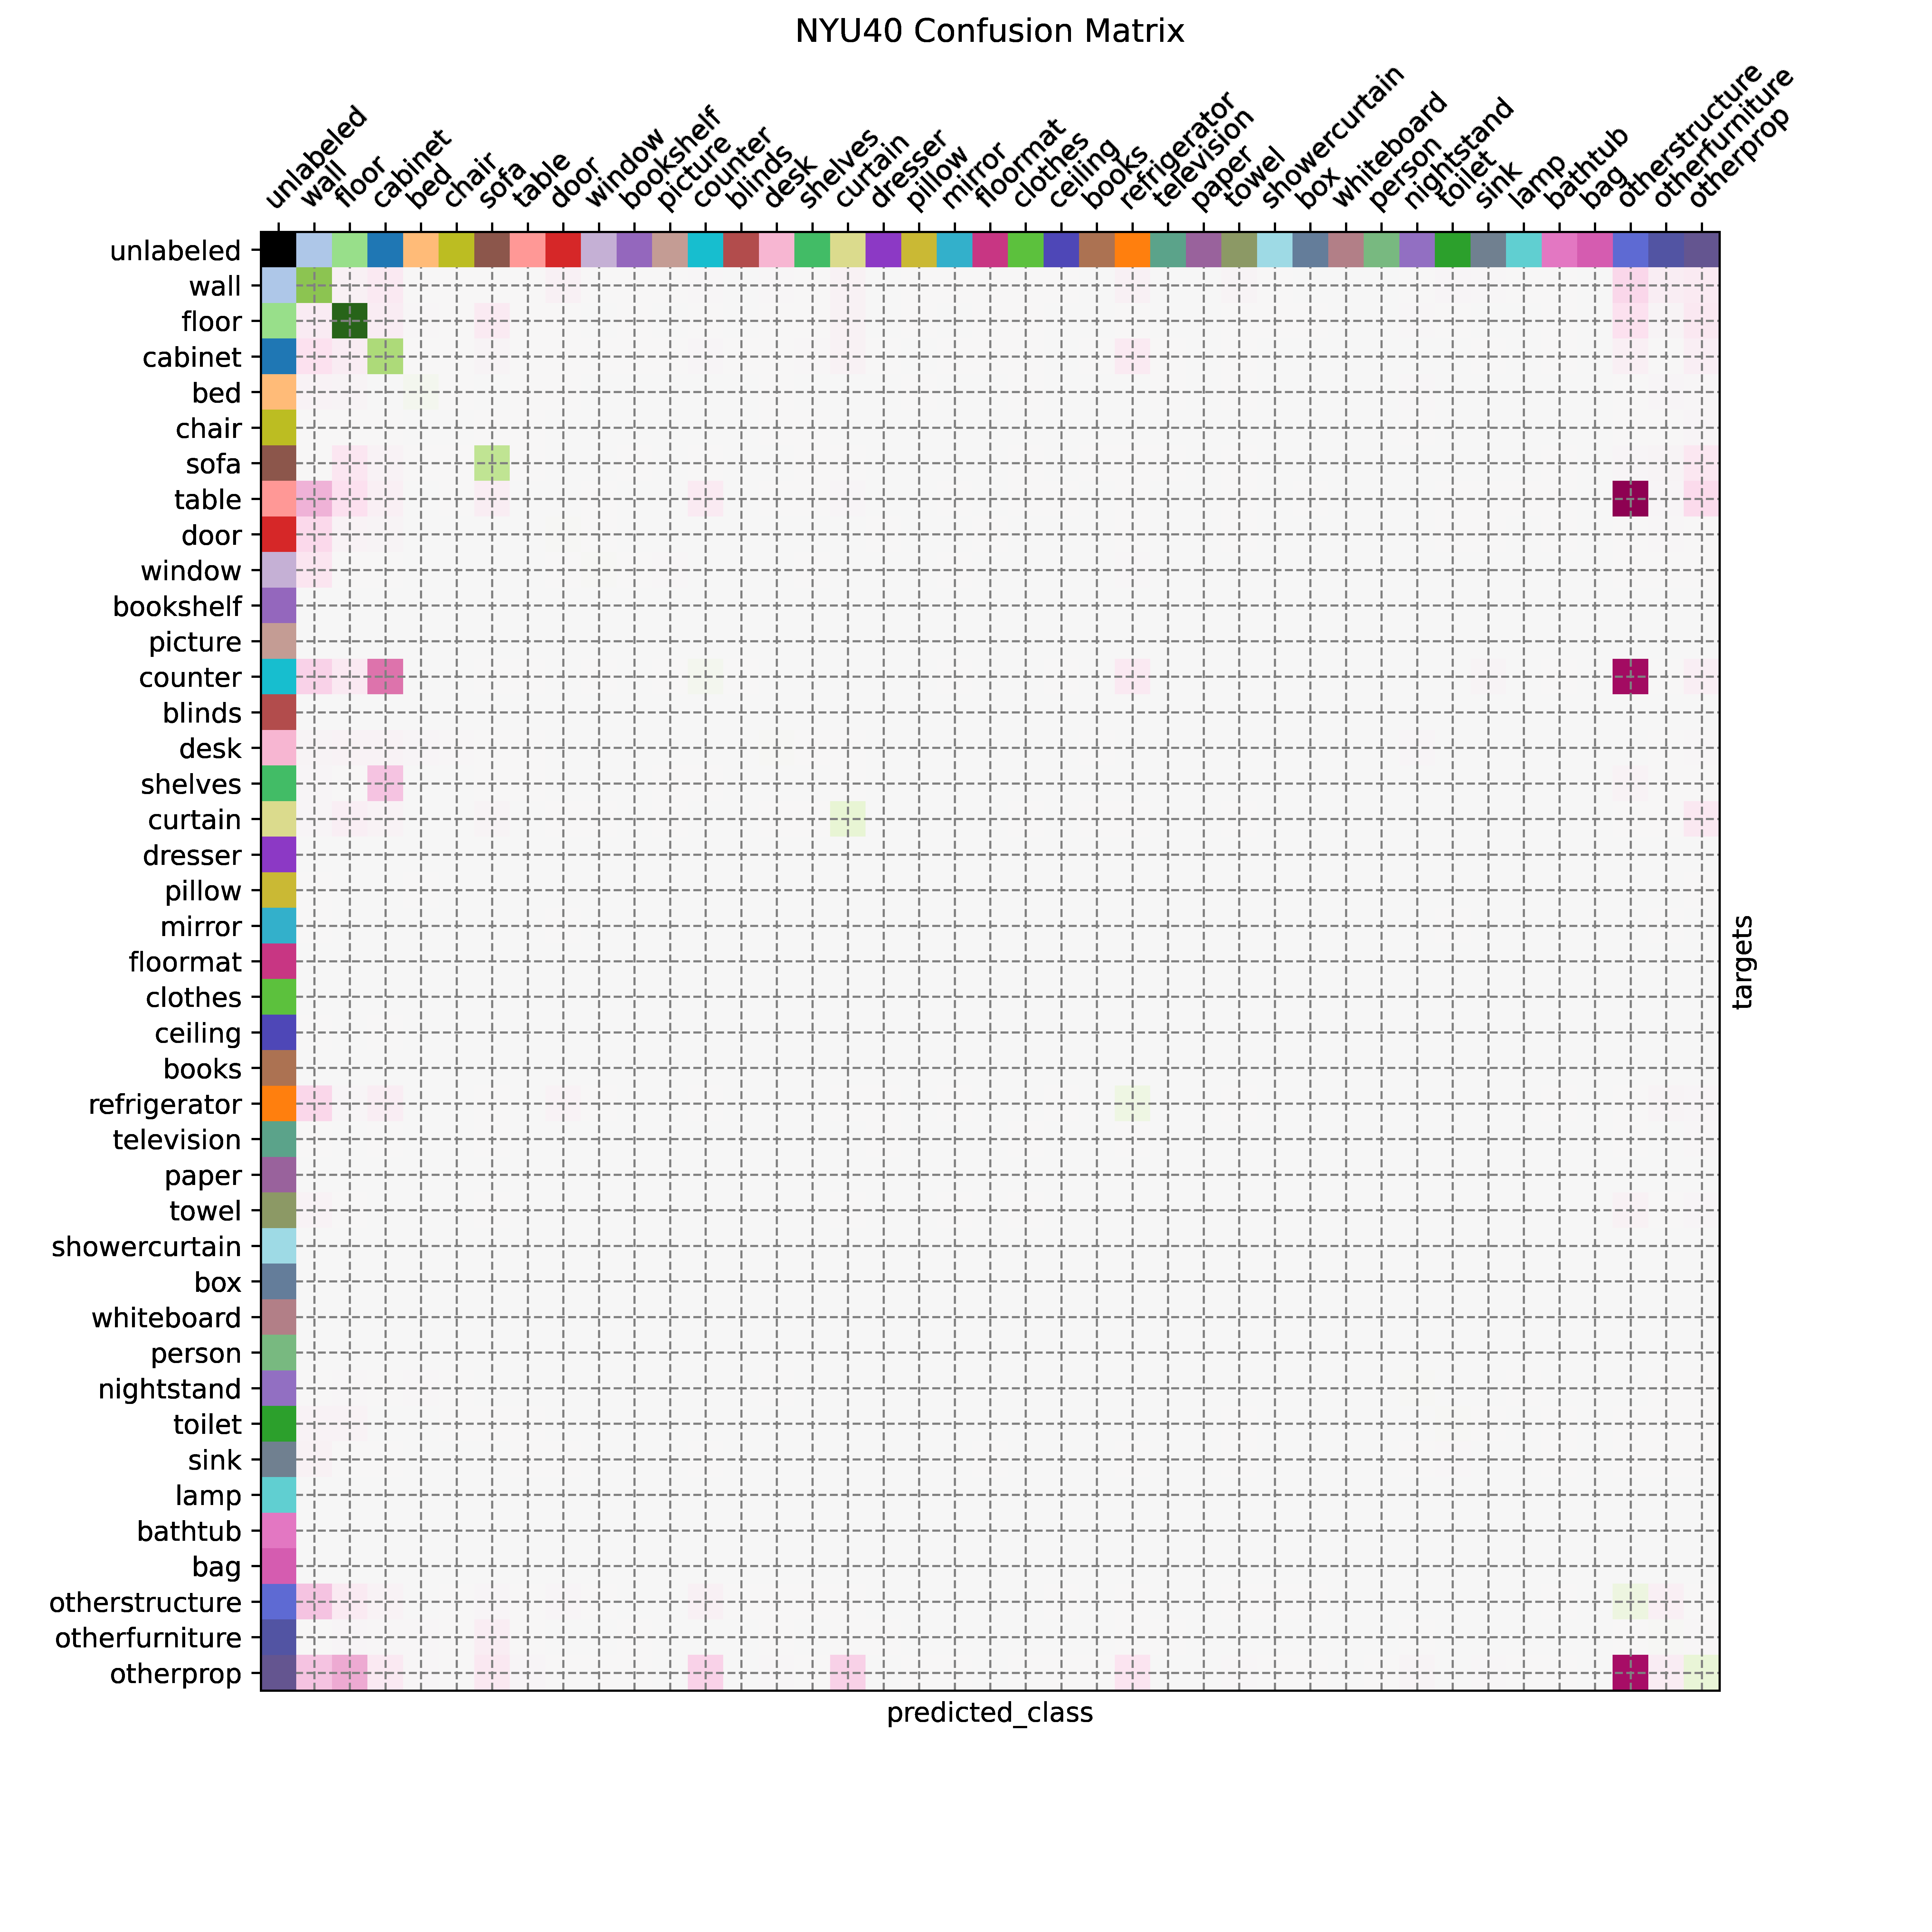

In [26]:
paths_dl = getPathsSegmentation(base="/home/jonfrey/results/scannet_pseudo_label/scannet", key="deeblab_v3")
acc_deeplab, agg_deeplab = paths_acc_conf( paths_dl)

paths_fast = getPathsSegmentation(base="/home/jonfrey/results/scannet_pseudo_label/scannet", key="segmentation_estimate")
acc_fast, agg_fast = paths_acc_conf( paths_fast)

In [46]:
print( "Deeplab Acc:", acc_deeplab )
print( "FastSCNN Acc:", acc_fast )

Deeplab Acc: 0.6599616997906635
FastSCNN Acc: 0.7592961280293365
